### Step 1: Import libraries and load X and y


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import pandas as pd
import joblib

# Load dataset
df = pd.read_csv('../data/medical_reports.csv')

# Extract labels
labels = df.columns[1:]
y = df[labels]

# TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['report_text'].str.lower().str.replace('\n', ' ', regex=True))

# Print to confirm
print("TF-IDF Shape:", X.shape)
print("Labels:", labels.tolist())


TF-IDF Shape: (200, 42)
Labels: ['diabetes', 'hypertension', 'pneumonia', 'asthma', 'arthritis']


### Step 2: Split data into train and test sets


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape


((160, 42), (40, 42))

### Step 3: Train a multilabel Logistic Regression model


In [6]:
model = OneVsRestClassifier(LogisticRegression())
model.fit(X_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression())

### Step 4: Predict and evaluate the model performance


In [8]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=labels, zero_division=0))


              precision    recall  f1-score   support

    diabetes       0.46      0.67      0.55        18
hypertension       0.61      0.76      0.68        25
   pneumonia       0.46      0.55      0.50        20
      asthma       0.51      0.90      0.65        20
   arthritis       0.46      0.68      0.55        19

   micro avg       0.51      0.72      0.59       102
   macro avg       0.50      0.71      0.59       102
weighted avg       0.51      0.72      0.59       102
 samples avg       0.50      0.69      0.55       102



### Step 5: Save trained model and vectorizer for later use


In [9]:
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(model, "../models/multilabel_model.pkl")
joblib.dump(vectorizer, "../models/vectorizer.pkl")


['../models/vectorizer.pkl']

### Step 6: Load model and test on new text


In [10]:
loaded_model = joblib.load("../models/multilabel_model.pkl")
loaded_vec = joblib.load("../models/vectorizer.pkl")

sample_text = ["Patient shows signs of pneumonia and asthma."]
sample_features = loaded_vec.transform(sample_text)
loaded_model.predict(sample_features)


array([[0, 1, 1, 1, 1]])

### Step 4.1: Visualize label-wise F1-scores using a bar plot
Let’s plot the F1-score of each label to quickly spot which diagnoses are performing well vs. poorly.


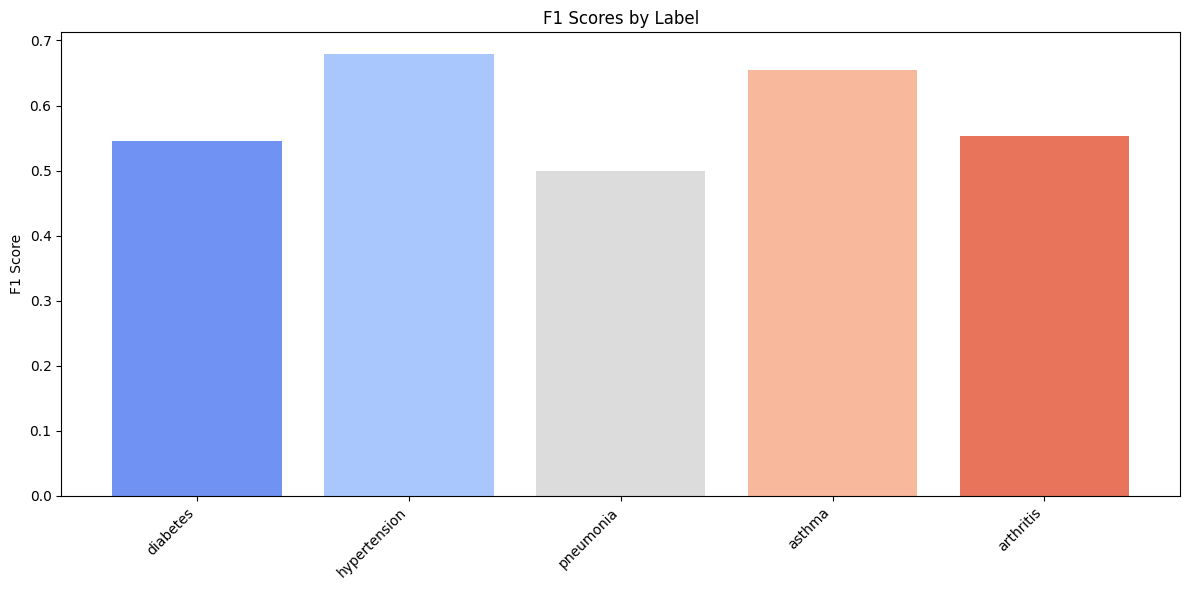

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a color palette
colors = sns.color_palette('coolwarm', len(labels))

# Plot using manual color assignment to avoid deprecated behavior
plt.figure(figsize=(12, 6))
bars = plt.bar(x=labels, height=f1_scores, color=colors)

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.ylabel("F1 Score")
plt.title("F1 Scores by Label")
plt.tight_layout()
plt.show()



### Step 7: Wrap-up modeling phase
1-I trained a multilabel Logistic Regression model using One-vs-Rest strategy.

2-I evaluated it using precision, recall, and F1-score for each label.

3-I visualized the F1-scores with a bar chart to understand performance distribution.

4-Finally, I saved the model and vectorizer for future inference.